# Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
df = pd.read_csv('../clean_data/movies.csv')
df.head()

,id_peli,title,budget,revenue,return,original_language,release_year,release_date,runtime,popularity,vote_average,vote_count
0,862,Toy Story,30000000.0,373554033.0,12.451801,en,1995,1995-10-30,81.0,21.946943,7.7,5415.0
1,8844,Jumanji,65000000.0,262797249.0,4.043035,en,1995,1995-12-15,104.0,17.015539,6.9,2413.0
2,15602,Grumpier Old Men,0.0,0.0,0.000000,en,1995,1995-12-22,101.0,11.712900,6.5,92.0
3,31357,Waiting To Exhale,16000000.0,81452156.0,5.090760,en,1995,1995-12-22,127.0,3.859495,6.1,34.0
4,11862,Father Of The Bride Part Ii,0.0,76578911.0,0.000000,en,1995,1995-02-10,106.0,8.387519,5.7,173.0


In [4]:
df.describe(include='all')

,id_peli,title,budget,revenue,return,original_language,release_year,release_date,runtime,popularity,vote_average,vote_count
count,41765.000000,41765,4.176500e+04,4.176500e+04,4.176500e+04,41755,41765.000000,41765,41529.000000,41765.000000,41765.000000,41765.000000
unique,NaN,41715,NaN,NaN,NaN,88,NaN,16300,NaN,NaN,NaN,NaN
top,NaN,Eye For An Eye,NaN,NaN,NaN,en,NaN,2008-01-01,NaN,NaN,NaN,NaN
freq,NaN,2,NaN,NaN,NaN,29518,NaN,127,NaN,NaN,NaN,NaN
mean,110453.064647,NaN,4.407573e+06,1.172123e+07,7.170354e+02,NaN,1992.827008,NaN,94.013533,2.956339,5.620546,114.211565
std,113820.563782,NaN,1.790885e+07,6.622383e+07,7.785516e+04,NaN,23.540768,NaN,38.167368,6.144492,1.914442,504.001804
min,2.000000,NaN,0.000000e+00,0.000000e+00,0.000000e+00,NaN,1874.000000,NaN,0.000000,0.000000,0.000000,0.000000
25%,26603.000000,NaN,0.000000e+00,0.000000e+00,0.000000e+00,NaN,1980.000000,NaN,85.000000,0.390142,5.000000,3.000000
50%,61341.000000,NaN,0.000000e+00,0.000000e+00,0.000000e+00,NaN,2002.000000,NaN,95.000000,1.138013,6.000000,10.000000
75%,162435.000000,NaN,0.000000e+00,0.000000e+00,0.000000e+00,NaN,2011.000000,NaN,107.000000,3.753097,6.800000,35.000000


In [6]:
df.corr()

C:\Users\tinma\AppData\Local\Temp\ipykernel_20820\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id_peli,budget,revenue,return,release_year,runtime,popularity,vote_average,vote_count
id_peli,1.000000,-0.103249,-0.071790,-0.007136,0.290796,-0.119407,-0.076432,-0.158276,-0.064350
budget,-0.103249,1.000000,0.771633,-0.002259,0.130437,0.138184,0.448751,0.075091,0.679296
revenue,-0.071790,0.771633,1.000000,0.000732,0.088238,0.107430,0.505147,0.085105,0.812086
return,-0.007136,-0.002259,0.000732,1.000000,-0.005713,0.000973,0.003231,0.005845,0.003583
release_year,0.290796,0.130437,0.088238,-0.005713,1.000000,0.085575,0.135092,0.037579,0.107969
runtime,-0.119407,0.138184,0.107430,0.000973,0.085575,1.000000,0.130266,0.162013,0.117435
popularity,-0.076432,0.448751,0.505147,0.003231,0.135092,0.130266,1.000000,0.152090,0.555273
vote_average,-0.158276,0.075091,0.085105,0.005845,0.037579,0.162013,0.152090,1.000000,0.124907
vote_count,-0.064350,0.679296,0.812086,0.003583,0.107969,0.117435,0.555273,0.124907,1.000000


In [291]:
# sourcery skip: use-fstring-for-concatenation
# Ahora vamos a obtener aquellos pares de variables que tengan una correlación mayor a 0.4
df = pd.read_csv('../clean_data/movies.csv')
dfx = np.isnan(df.corr()[(df.corr() > 0.4) & (df.corr() < 1)])

lista = []
for x in list(dfx.columns):
    lista.extend(
        tuple(sorted([x, list(dfx.columns)[i]]))
        for i in range(len(list(dfx.columns)))
        if dfx[f'{x}'][i] == False
    )
    
dfx = pd.DataFrame(lista,columns=['uno','dos'])
dfx['dummy'] = dfx.uno + ' ' + dfx.dos
dfx = list(dfx.dummy.unique())
dfx = pd.DataFrame(dfx,columns=['cero'])
dfy = pd.DataFrame()
for x in dfx.cero.apply(lambda y: y.split(' ')):
    dfy = pd.concat([dfy,pd.DataFrame([x],columns=['u','d'])])
dfy = dfy.reset_index(drop=True)
dfy

df = pd.read_csv('../clean_data/movies.csv')
dfx = df.corr()[(df.corr() > 0.4) & (df.corr() < 1)]
dfy['correlacion'] = pd.Series(dtype=float)
for i in range(len(dfy)):
    dfy.loc[i,'correlacion'] = dfx.loc[dfy.u[i],dfy.d[i]]

# Los ordenamos por aquellas correlaciones más importantes
dfy.sort_values(by='correlacion',ascending=False)

C:\Users\tinma\AppData\Local\Temp\ipykernel_42488\2699277023.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfx = np.isnan(df.corr()[(df.corr() > 0.4) & (df.corr() < 1)])
C:\Users\tinma\AppData\Local\Temp\ipykernel_42488\2699277023.py:25: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfx = df.corr()[(df.corr() > 0.4) & (df.corr() < 1)]


,u,d,correlacion
4,revenue,vote_count,0.812086
0,budget,revenue,0.771633
2,budget,vote_count,0.679296
5,popularity,vote_count,0.555273
3,popularity,revenue,0.505147
1,budget,popularity,0.448751


In [7]:
# Ordenamiento por "revenue".
# Ahora veamos las correlaciones en diferentes dataframes, ordenados por cada una de las 4 variables que tenemos.
# Veamos las películas ordenadas por revenue de mayor a menor. Las primeras 50
df[['title','revenue', 'budget','vote_count','popularity','vote_average']][df.revenue > 0].sort_values(by='revenue',ascending=False)[:61]

,title,revenue,budget,vote_count,popularity,vote_average
13066,Avatar,2.787965e+09,237000000.0,12114.0,185.070892,7.2
24131,Star Wars: The Force Awakens,2.068224e+09,245000000.0,7993.0,31.626013,7.5
1467,Titanic,1.845034e+09,200000000.0,7770.0,26.889070,7.5
16043,The Avengers,1.519558e+09,220000000.0,12000.0,89.887648,7.4
22773,Jurassic World,1.513529e+09,150000000.0,8842.0,32.790475,6.5
...,...,...,...,...,...,...
17904,The Twilight Saga: Breaking Dawn - Part 2,8.290000e+08,120000000.0,2641.0,26.080995,6.1
13925,Inception,8.255328e+08,160000000.0,14075.0,29.108149,8.1
4653,Spider-Man,8.217086e+08,139000000.0,5398.0,29.413341,6.8
30429,Wonder Woman,8.205804e+08,149000000.0,5025.0,294.337037,7.2


In [8]:
# Ordenamiento por "budget".
# Veamos las películas ordenadas por budget de mayor a menor. Con por lo menos 25 votos. Las primeras 50
df[['title','revenue', 'budget','vote_count','popularity','vote_average']][df.revenue > 0].sort_values(by='budget',ascending=False)[:61]

,title,revenue,budget,vote_count,popularity,vote_average
15421,Pirates Of The Caribbean: On Stranger Tides,1.045714e+09,380000000.0,5068.0,27.887720,6.4
10559,Pirates Of The Caribbean: At World'S End,9.610000e+08,300000000.0,4627.0,31.363664,6.9
24134,Avengers: Age Of Ultron,1.405404e+09,280000000.0,6908.0,37.379420,7.3
9868,Superman Returns,3.910812e+08,270000000.0,1429.0,13.284712,5.4
16829,John Carter,2.841391e+08,260000000.0,2170.0,14.670353,6.1
...,...,...,...,...,...,...
15573,Transformers: Dark Of The Moon,1.123747e+09,195000000.0,3351.0,4.503505,6.1
18568,Jack The Giant Slayer,1.976876e+08,195000000.0,2634.0,11.606061,5.5
26206,Furious 7,1.506249e+09,190000000.0,4253.0,27.275687,7.3
26635,Tomorrowland,2.091543e+08,190000000.0,2904.0,22.296076,6.2


In [9]:
# Ordenamiento por "vote_count".
# Veamos las películas ordenadas por vote_count de mayor a menor. Con por lo menos 25 votos. Las primeras 50
df[['title','revenue', 'budget','vote_count','popularity','vote_average']][df.revenue > 0].sort_values(by='vote_count',ascending=False)[df.vote_count >= 25][:61]

C:\Users\tinma\AppData\Local\Temp\ipykernel_20820\1005892801.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[['title','revenue', 'budget','vote_count','popularity','vote_average']][df.revenue > 0].sort_values(by='vote_count',ascending=False)[df.vote_count >= 25][:61]


,title,revenue,budget,vote_count,popularity,vote_average
13925,Inception,8.255328e+08,160000000.0,14075.0,29.108149,8.1
13066,Avatar,2.787965e+09,237000000.0,12114.0,185.070892,7.2
16043,The Avengers,1.519558e+09,220000000.0,12000.0,89.887648,7.4
24138,Deadpool,7.831130e+08,58000000.0,11444.0,187.860492,7.4
20748,Interstellar,6.751200e+08,165000000.0,11187.0,32.213481,8.1
...,...,...,...,...,...,...
23200,Kingsman: The Secret Service,4.143515e+08,81000000.0,6069.0,28.224212,7.6
21187,Lucy,1.265468e+08,40000000.0,6048.0,36.447603,6.3
6885,Harry Potter And The Prisoner Of Azkaban,7.898046e+08,130000000.0,6037.0,28.460276,7.7
24136,Ant-Man,5.193120e+08,130000000.0,6029.0,26.882388,7.0


In [10]:
# Ordenamiento por "vote_average".
# Veamos las películas ordenadas por vote_average de mayor a menor. Con por lo menos 25 votos. Las primeras 50
df[['title','revenue', 'budget','vote_count','popularity','vote_average']][df.revenue > 0].sort_values(by='vote_average',ascending=False)[df.vote_count >= 25][:61]

C:\Users\tinma\AppData\Local\Temp\ipykernel_20820\2135389197.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[['title','revenue', 'budget','vote_count','popularity','vote_average']][df.revenue > 0].sort_values(by='vote_average',ascending=False)[df.vote_count >= 25][:61]


,title,revenue,budget,vote_count,popularity,vote_average
9161,Dilwale Dulhania Le Jayenge,100000000.0,13200000.0,661.0,34.457024,9.1
2436,Stop Making Sense,4978922.0,1200000.0,47.0,2.359569,8.7
289,The Shawshank Redemption,28341469.0,25000000.0,8358.0,51.645403,8.5
755,The Godfather,245066411.0,6000000.0,6024.0,41.109264,8.5
36882,Your Name.,355298270.0,0.0,1030.0,34.461252,8.5
...,...,...,...,...,...,...
937,Reservoir Dogs,14661007.0,1200000.0,3821.0,12.220340,8.1
4349,Witness For The Prosecution,9000000.0,3000000.0,278.0,9.730217,8.1
537,The Silence Of The Lambs,272742922.0,19000000.0,4549.0,4.307222,8.1
22559,The Imitation Game,233555708.0,14000000.0,5895.0,31.595940,8.0


In [280]:
# Películas que votaron menos de 101 personas y más de 24, y que además están dentro de las primeras 100 peliculas en
df.title[[2436, 2865, 1026, 604, 30047, 16692, 21990, 6087, 5482, 4771,
            18363, 4688, 603]]

2436                          Stop Making Sense
2865                            For All Mankind
1026                           Paris Is Burning
604                            The World Of Apu
30047                         The Beauty Inside
16692    Louis C.K.: Live At The Beacon Theater
21990                       The Look Of Silence
6087                        Tupac: Resurrection
5482                              Day For Night
4771                                          Z
18363                                     Sunny
4688                             The Last Waltz
603                             Pather Panchali
Name: title, dtype: object

In [11]:
# Ordenamiento por "popularity".
# Ahora veamos las 50 películas más populares.
df[['title','revenue', 'budget','vote_count','popularity','vote_average']][df.popularity > 0].sort_values(by='popularity',ascending=False)[:61]

,title,revenue,budget,vote_count,popularity,vote_average
27945,Minions,1.156731e+09,74000000.0,4729.0,547.488298,6.4
30429,Wonder Woman,8.205804e+08,149000000.0,5025.0,294.337037,7.2
38733,Beauty And The Beast,1.262886e+09,160000000.0,5530.0,287.253654,6.8
40083,Baby Driver,2.245113e+08,34000000.0,2083.0,228.032744,7.2
22193,Big Hero 6,6.521054e+08,165000000.0,6289.0,213.849907,7.8
...,...,...,...,...,...,...
38697,Before I Fall,1.002557e+07,5000000.0,651.0,38.995136,6.8
4252,Harry Potter And The Philosopher'S Stone,9.764756e+08,125000000.0,7188.0,38.187238,7.5
41523,Girls Trip,0.000000e+00,0.0,393.0,37.964872,7.1
41302,2:22,4.220000e+02,0.0,277.0,37.484577,5.5


C:\Users\tinma\AppData\Local\Temp\ipykernel_42488\88233728.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


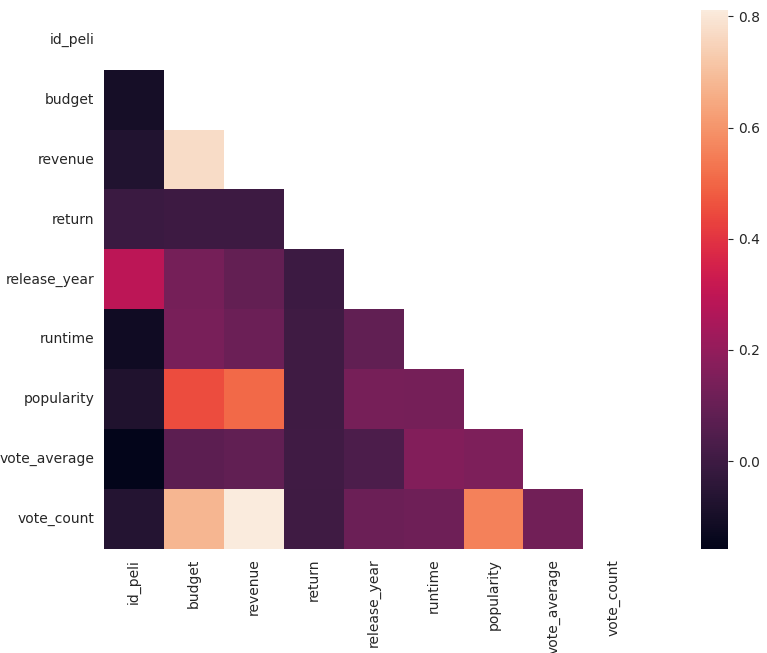

In [190]:
# Ahora veamos la matriz de correlación en un heatmap de seaborn
plt.figure(figsize=(15,7))
# df.corr() creates a correlation matrix 
corr_matrix = df.corr()
# helps in creating a 0's matrix of df.corr() shape
mask = np.zeros_like(corr_matrix)
# Returns copy of array with lower part of the triangle
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(corr_matrix, mask=mask, square=True)

<AxesSubplot: xlabel='revenue', ylabel='vote_count'>

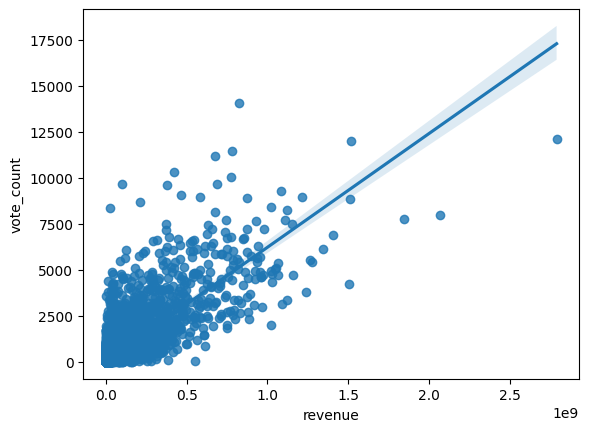

In [243]:
# Ahora veamos gráficamente estas relaciones.
sns.regplot(x=df.revenue,y=df.vote_count)

<AxesSubplot: xlabel='revenue', ylabel='budget'>

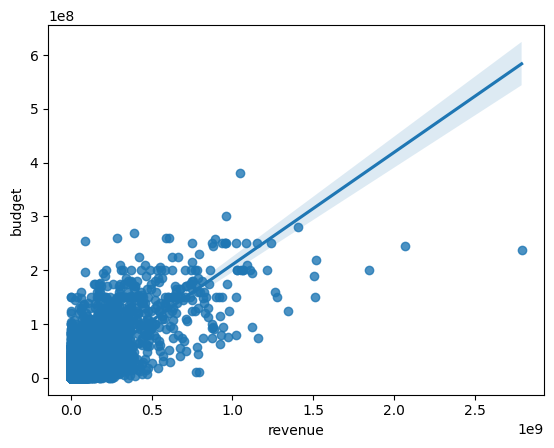

In [244]:
sns.regplot(x=df.revenue,y=df.budget)

<AxesSubplot: xlabel='revenue', ylabel='popularity'>

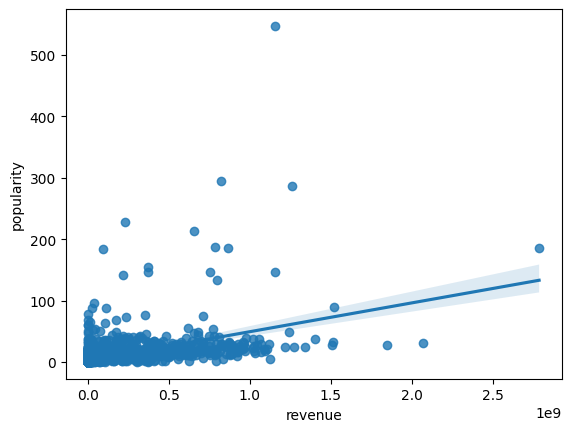

In [245]:
sns.regplot(x=df.revenue,y=df.popularity)

<AxesSubplot: xlabel='budget', ylabel='vote_count'>

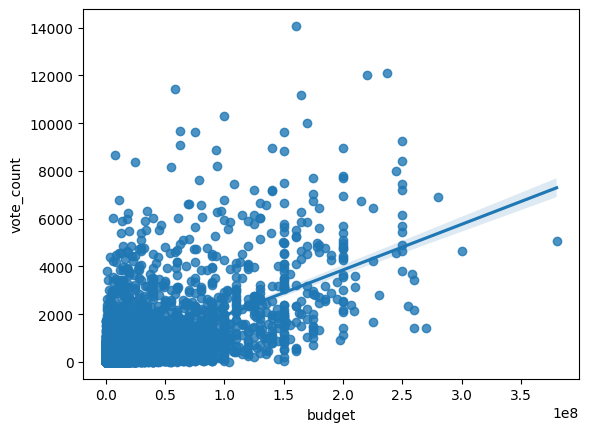

In [246]:
sns.regplot(x=df.budget,y=df.vote_count)

<AxesSubplot: xlabel='popularity', ylabel='vote_count'>

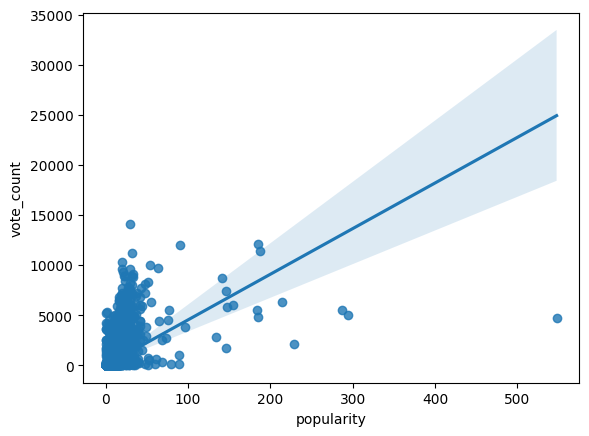

In [247]:
sns.regplot(x=df.popularity,y=df.vote_count)

<AxesSubplot: xlabel='budget', ylabel='popularity'>

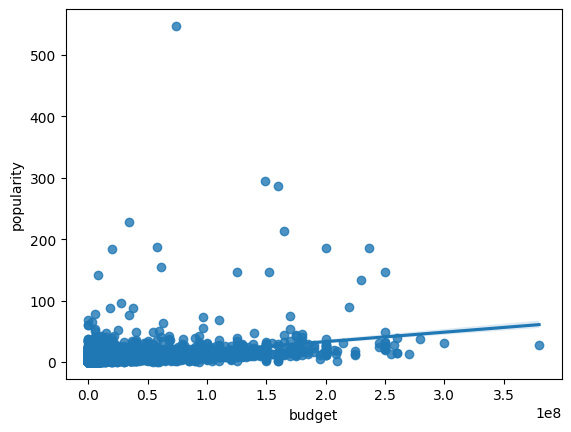

In [249]:
sns.regplot(x=df.budget,y=df.popularity)

# Creo que el EDA básico que nos recomiendan en el readme no nos ofrece nada de valor para el sistema de recomendación. O al menos yo no supe encontrarlo.

Algo que ya había pensado antes de hacerlo. Pero me gustó ver algunas relaciones y me dí el tiempo de ver las películas más populares, las más votadas y las que mejor se calificaron con un mínimo de votos de 25 personas. Me gustó ver algunas de las películas que más me han gustado en las más populares y mejor calificadas, así como en las que mayor revenue tenían.

Sin embargo, me parece que con algo de más elaboración se pueden generar nuevas variables a partir de las existentes que puedan generar más valor